<a href="https://colab.research.google.com/github/Alexander-Resch/Colab_Notebooks/blob/main/Triangles2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

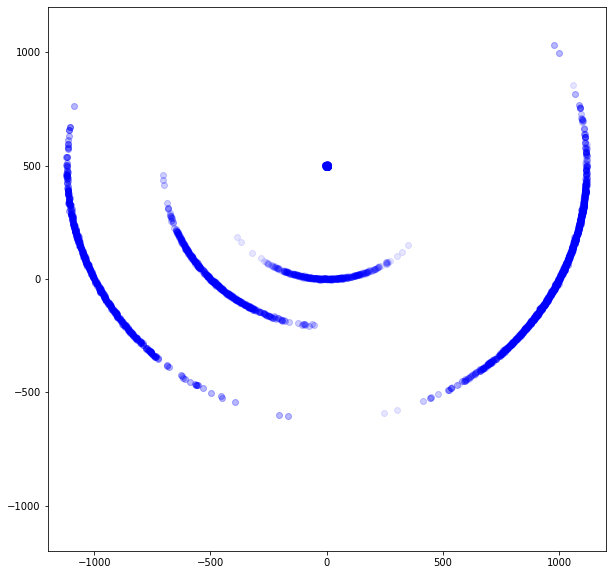

In [8]:
def add_Noise(X=[0,0],sigma=1,mu=0,sigma_alpha=0):

  X[0] = X[0]+sigma*np.random.randn()+mu
  X[1] = X[1]+sigma*np.random.randn()+mu
  rotation = sigma_alpha*np.random.randn()

  return X, rotation

def rotate_Points(Coordinates,angle_in_degrees,center_of_rotation=(0,0)):
  rotation = angle_in_degrees*np.pi/180 #convert to radian
  M = np.array([[np.cos(rotation),-np.sin(rotation)],
                [np.sin(rotation),np.cos(rotation)]])
  
  Rotated_Coordinates = []
  
  for point in Coordinates:
    point=list(point)
    #print('initial point: ', point)
    
    point[0] = point[0]-center_of_rotation[0]
    point[1] = point[1]-center_of_rotation[1]
    #print('shifted point: ', point)

    p = np.array([[point[0]],
                  [point[1]]])
    #print(M.shape,p.shape)
    p_new = np.ravel(M.dot(p))
    #print('rotated point: ', p_new)

    p_new[0] = p_new[0]+center_of_rotation[0]
    p_new[1] = p_new[1]+center_of_rotation[1]
    #print('shifted bacl point: ', p_new)

    Rotated_Coordinates.append((p_new[0],p_new[1]))
  
  return Rotated_Coordinates

#define distances between Target and Work Piece
dBTs = [[-1000,-500],[-500,-500],[0,-500]]
#simulate for n runs
n = 500

f = plt.figure(figsize=(10,10))
ax = f.add_subplot()
ax.set_xlim([-1200,1200])
ax.set_ylim([-1200,1200])

q = []

for dBT in dBTs:
  for i in range(n):

    'DEFINE COORDINATES [mm]'
    
    #Target Mark
    tx, ty = 0, 500
    T = [tx, ty]
    T, angle_in_degrees = add_Noise(T,sigma=2,sigma_alpha=15)
    
    #work piece
    xBT, yBT = dBT#0, -500
    bx, by = 0, 0
    B = [bx, by]  
    B[0], B[1] = T[0]+xBT,T[1]+yBT

    #Robot
    xWT, yWT = 1000, -500
    wx, wy = 1000, 0
    W = [wx,wy]
    W[0], W[1] = T[0]+xWT,T[1]+yWT



    tri = [T,B,W]
    rotated_triangle = rotate_Points(tri,angle_in_degrees=angle_in_degrees,center_of_rotation=T)
    q.append(rotated_triangle)

  #plot simulated runs
  for triangle in q:
    for p in triangle:
      ax.scatter(p[0],p[1],alpha = 0.1, color = 'blue')
